<a href="https://colab.research.google.com/github/rohinishinde1009/codesoft-task-1/blob/main/04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
sales_data = pd.read_csv('advertise.csv')

In [ ]:
print(sales_data.info())
print(sales_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   TV,Radio,Newspaper,Sales  200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None
       TV,Radio,Newspaper,Sales
count                       200
unique                      200
top        230.1,37.8,69.2,22.1
freq                          1


In [ ]:
print(sales_data.columns)

Index(['TV,Radio,Newspaper,Sales'], dtype='object')


In [ ]:
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   TV,Radio,Newspaper,Sales  200 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None


In [ ]:
feature_column = 'TV,Radio,Newspaper,Sales'

In [ ]:
sales_data[feature_column] = sales_data[feature_column].str.split(',')
sales_data[['TV', 'Radio', 'Newspaper', 'Sales']] = pd.DataFrame(sales_data[feature_column].tolist(), index=sales_data.index)
sales_data[['TV', 'Radio', 'Newspaper', 'Sales']] = sales_data[['TV', 'Radio', 'Newspaper', 'Sales']].apply(pd.to_numeric)
sales_data = sales_data.drop(columns=[feature_column])

In [ ]:
X = sales_data[['TV', 'Radio', 'Newspaper']]
y = sales_data['Sales']

In [ ]:
X = pd.get_dummies(X, columns=['Newspaper'], drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 6.165416289895124e+21
R-squared: -1.9952093258476637e+20


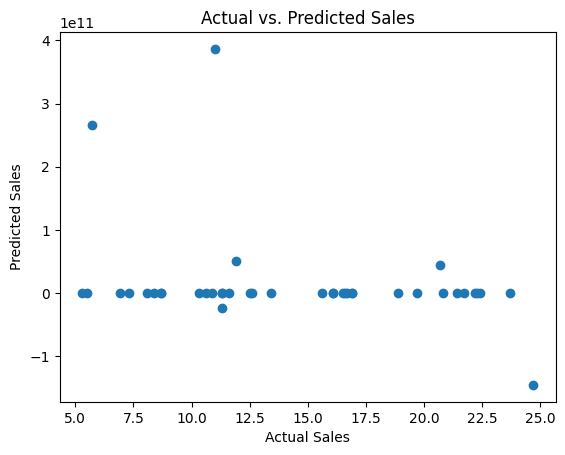

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()